<a href="https://colab.research.google.com/github/ZA3karia/course-articles-videos-recomendation/blob/master/treating_indeed_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the dataset
The dataset used for this article is a subset of the papers.csv dataset provided in the NIPS paper datasets on Kaggle. Only those rows that contain an abstract have been used. The title and abstract have been concatenated after which the file is saved as a tab separated *.txt file.

In [43]:
import pandas
# load the dataset
path = input("give me the csv file path :")
dataset = pandas.read_csv(path)
dataset.head()

give me the csv file path :/content/web_dev (1).csv


,Unnamed: 0,title,url,post
0,0,"Austin, TX 78735",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Lee Tilford Agency is looking to bring an ...
1,1,Web Development Project Manager,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,American Cruise Lines is the leading small shi...
2,2,"Baltimore, MD 21218",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Space Telescope Science Institute is the s...
3,3,Web Production Specialist,https://www.indeed.com/rc/clk?jk=4286ca624ba7b...,Follow Get job updates from Billabong Group\n\...
4,4,Web Developer,https://www.indeed.com/rc/clk?jk=53a0854a1de59...,"RSA, a Dell Technologies business, helps more ..."


#Preliminary text exploration
Before we proceed with any text pre-processing, it is advisable to quickly explore the dataset in terms of word counts, most common and most uncommon words.
##Fetch word count for each abstract

In [4]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['post'].apply(lambda x: len(str(x).split(" ")))
dataset[['post','word_count']].head()

,post,word_count
0,The Lee Tilford Agency is looking to bring an ...,304
1,American Cruise Lines is the leading small shi...,101
2,The Space Telescope Science Institute is the s...,910
3,Follow Get job updates from Billabong Group\n\...,29
4,"RSA, a Dell Technologies business, helps more ...",499


In [5]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count     246.000000
mean      395.609756
std       248.800670
min         9.000000
25%       223.000000
50%       386.000000
75%       563.500000
max      1946.000000
Name: word_count, dtype: float64

##Most common and uncommon words
A peek into the most common words gives insights not only on the frequently used words but also words that could also be potential data specific stop words. A comparison of the most common words and the default English stop words will give us a list of words that need to be added to a custom stop word list.

In [6]:
#Identify common words
freq = pandas.Series(' '.join(dataset['post']).split()).value_counts()[:20]
freq

and           5656
to            2896
the           2312
a             1996
of            1992
in            1594
with          1569
for           1258
is             832
our            735
or             607
on             587
as             583
be             575
are            562
experience     534
will           494
web            484
work           478
that           469
dtype: int64

In [7]:
#Identify uncommon words
freq1 =  pandas.Series(' '.join(dataset 
         ['post']).split()).value_counts()[-20:]
freq1

audiences.         1
OPPORTUNITY        1
analyzes,          1
mode               1
Eligible           1
Pre-Production,    1
thinker.           1
professionalism    1
OTHER              1
Standard           1
quartered          1
peripherals.       1
hats.              1
High-School        1
.NET,              1
Enforce            1
gzip               1
(50%               1
clerical           1
Flickr,            1
dtype: int64

Text Pre-processing
![alt text](https://miro.medium.com/max/700/1*yOna3oFFjHmCRti1qusMAA.png)
###Sparsity:
*In text mining, huge matrices are created based on word frequencies with many cells having zero values. This problem is called sparsity and is minimized using various techniques.*


Text pre-processing can be divided into two broad categories — noise removal & normalization. Data components that are redundant to the core text analytics can be considered as noise.
![alt text](https://miro.medium.com/max/700/1*vwT-_4Eo5vcNrQ9JNl1gYg.png)
Handling multiple occurrences / representations of the same word is called normalization. There are two types of normalization — stemming and lemmatization. Let us consider an example of various versions of the word learn — learn, learned, learning, learner. Normalisation will convert all these words to a single normalised version — “learn”.

*Stemming normalizes text by removing suffixes.
Lemmatisation is a more advanced technique which works based on the root of the word. *

The following example illustrates the way stemming and lemmatisation work:

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


To carry out text pre-processing on our dataset, we will first import the required libraries.

In [11]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Removing stopwords: **Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

There is a default list of stopwords in python nltk library. In addition, we might want to add context specific stopwords for which the “most common words” that we listed in the beginning will be helpful. We will now see how to create a list of stopwords and how to add custom stopwords:

In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

We will now carry out the pre-processing tasks step-by-step to get a cleaned and normalised text corpus:

In [0]:
corpus = []
for post in dataset['post']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', post)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [14]:
#View corpus item
corpus[222]

'job securedata com leader hardware encryption storage data security service looking front end wordpress web developer ideal candidate broad understanding web application development knowledge content management system ability work within cross functional team candidate must ability actively manage multiple web based project work tight deadline consistently delivering quality result job responsibility maintain current wordpress website front end feature inception design feedback implementation launch work customize wordpress plugins optimize code maximum speed scalability collaborate back end developer process connecting api collaborate project manager designer process creating design mockups understanding seo current best standard schema mockup write high quality code qualification wordpress development year experience bitbucket github strong knowledge html cs php knowledge woocommerce platform good understanding cross browser compatibility issue way work around strong knowledge exper

#Data Exploration
We will now visualize the text corpus that we created after pre-processing to get insights on the most frequently used words.

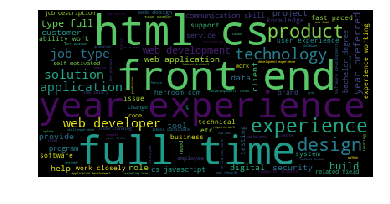

In [40]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

#Text preparation
Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. There are 2 parts of this conversion — Tokenisation and Vectorisation.

*Tokenisation is the process of converting the continuous text into a list of words. The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.*

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.

#Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

Let us now understand the parameters passed into the function:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
max_features — determines the number of columns in the matrix.
n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.
An encoded vector is returned with a length of the entire vocabulary.


In [17]:
list(cv.vocabulary_.keys())[:10]

['lee',
 'tilford',
 'agency',
 'looking',
 'bring',
 'additional',
 'person',
 'board',
 'full',
 'time']

##Visualize top N uni-grams, bi-grams & tri-grams
We can use the CountVectoriser to visualise the top 20 unigrams, bi-grams and tri-grams.

[Text(0, 0, 'experience'),
 Text(0, 0, 'web'),
 Text(0, 0, 'team'),
 Text(0, 0, 'work'),
 Text(0, 0, 'development'),
 Text(0, 0, 'year'),
 Text(0, 0, 'design'),
 Text(0, 0, 'skill'),
 Text(0, 0, 'application'),
 Text(0, 0, 'required'),
 Text(0, 0, 'project'),
 Text(0, 0, 'developer'),
 Text(0, 0, 'job'),
 Text(0, 0, 'company'),
 Text(0, 0, 'time'),
 Text(0, 0, 'service'),
 Text(0, 0, 'system'),
 Text(0, 0, 'environment'),
 Text(0, 0, 'knowledge'),
 Text(0, 0, 'position')]

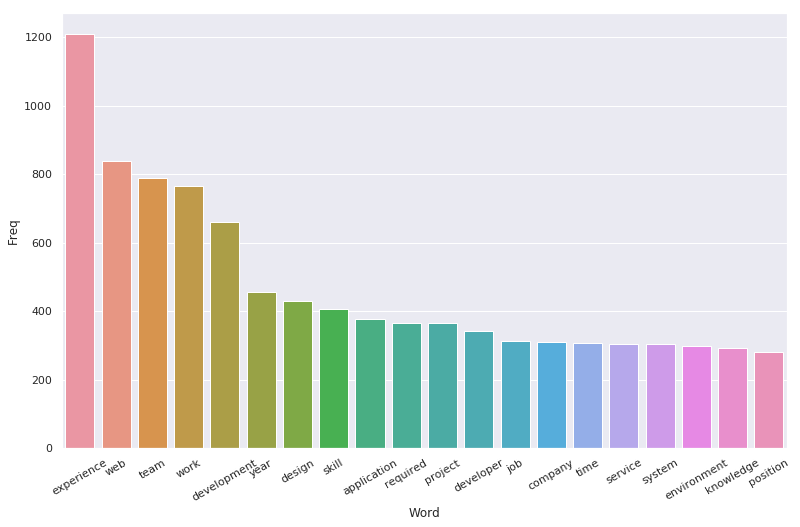

In [18]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                Bi-gram  Freq
0               html cs   149
1             front end   140
2             full time   138
3       year experience   133
4         web developer   113
5              job type   112
6       web development   105
7        year preferred    94
8             type full    91
9       web application    91
10  communication skill    75
11        cs javascript    73
12      bachelor degree    71
13      user experience    71
14         work closely    69
15         ability work    65
16          herroom com    65
17        work location    64
18   experience working    64
19           fast paced    62


[Text(0, 0, 'html cs'),
 Text(0, 0, 'front end'),
 Text(0, 0, 'full time'),
 Text(0, 0, 'year experience'),
 Text(0, 0, 'web developer'),
 Text(0, 0, 'job type'),
 Text(0, 0, 'web development'),
 Text(0, 0, 'year preferred'),
 Text(0, 0, 'type full'),
 Text(0, 0, 'web application'),
 Text(0, 0, 'communication skill'),
 Text(0, 0, 'cs javascript'),
 Text(0, 0, 'bachelor degree'),
 Text(0, 0, 'user experience'),
 Text(0, 0, 'work closely'),
 Text(0, 0, 'ability work'),
 Text(0, 0, 'herroom com'),
 Text(0, 0, 'work location'),
 Text(0, 0, 'experience working'),
 Text(0, 0, 'fast paced')]

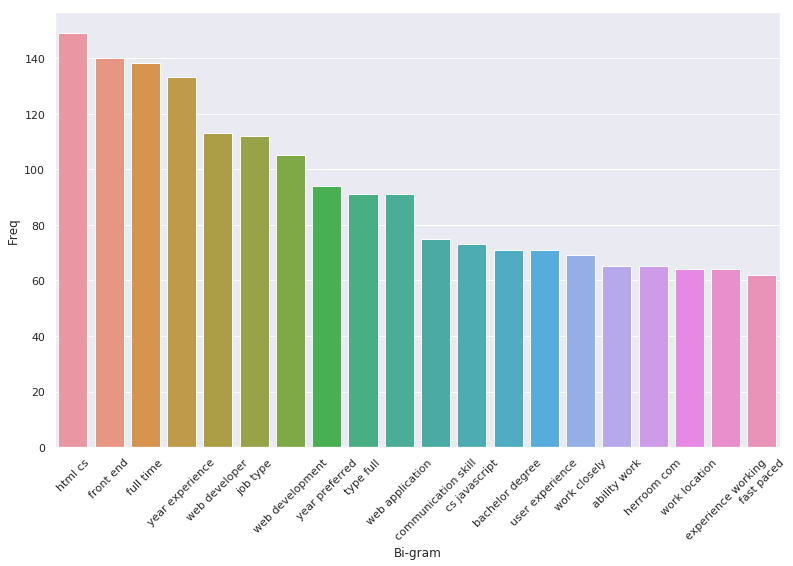

In [19]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                       Tri-gram  Freq
0                type full time    91
1                 job type full    90
2            html cs javascript    68
3              full time salary    41
4              time salary year    41
5       degree computer science    35
6        work location location    35
7        web developer position    34
8        salary year experience    34
9        fast paced environment    33
10     experience relevant year    29
11      relevant year preferred    29
12    company describes culture    29
13        front end development    29
14         full time experience    28
15  communication skill written    28
16     across multiple platform    27
17      year preferred location    26
18        hana maintain develop    26
19          email web developer    26


[Text(0, 0, 'type full time'),
 Text(0, 0, 'job type full'),
 Text(0, 0, 'html cs javascript'),
 Text(0, 0, 'full time salary'),
 Text(0, 0, 'time salary year'),
 Text(0, 0, 'degree computer science'),
 Text(0, 0, 'work location location'),
 Text(0, 0, 'web developer position'),
 Text(0, 0, 'salary year experience'),
 Text(0, 0, 'fast paced environment'),
 Text(0, 0, 'experience relevant year'),
 Text(0, 0, 'relevant year preferred'),
 Text(0, 0, 'company describes culture'),
 Text(0, 0, 'front end development'),
 Text(0, 0, 'full time experience'),
 Text(0, 0, 'communication skill written'),
 Text(0, 0, 'across multiple platform'),
 Text(0, 0, 'year preferred location'),
 Text(0, 0, 'hana maintain develop'),
 Text(0, 0, 'email web developer')]

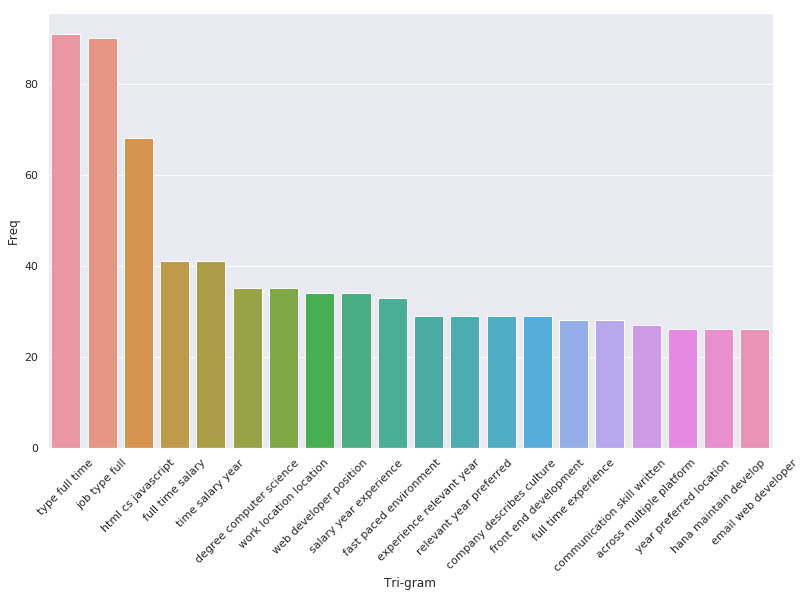

In [20]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

#Converting to a matrix of integers
The next step of refining the word counts is using the TF-IDF vectoriser. The deficiency of a mere word count obtained from the countVectoriser is that, large counts of certain common words may dilute the impact of more context specific words in the corpus. This is overcome by the TF-IDF vectoriser which penalizes words that appear several times across the document. TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.

TF-IDF consists of 2 components:

TF — term frequency

IDF — Inverse document frequency
![alt text](https://miro.medium.com/max/700/1*H0aRm_BHC_3QZIopp1iMcQ.png)


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[200]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [27]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
  
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,2)

# now print the results
print("\npost:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


post:
looking entry level junior level programmer join engineering team programmer develop web application php linux mysql apache framework job type full time location milpitas ca requirement

Keywords:
programmer 0.432
ca 0.268


In [0]:
keys = []
for doc in corpus:
  tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
  sorted_items = sort_coo(tf_idf_vector.tocoo())
  keywords = extract_topn_from_vector(feature_names,sorted_items,10)
  keys += keywords

In [37]:
len(keys)

2446

In [38]:
keys

['plugins',
 'position',
 'woo commerce',
 'woo',
 'tilford agency',
 'tilford',
 'lee tilford agency',
 'lee tilford',
 'lee',
 'agency',
 'cruise line',
 'cruise',
 'web project',
 'line',
 'website ecommerce platform',
 'website ecommerce',
 'web project role',
 'web project designed',
 'web development project',
 'usability customer satisfaction',
 'aura',
 'stsci',
 'outreach',
 'diversity',
 'telescope',
 'space telescope',
 'space',
 'public outreach',
 'jahia',
 'scientific',
 'say',
 'international',
 'asking',
 'pas',
 'extreme',
 'get',
 'follow',
 'group',
 'update',
 'make',
 'rsa',
 'dell',
 'content',
 'cybersecurity',
 'business',
 'status',
 'adobe experience manager',
 'adobe experience',
 'discrimination',
 'experience manager',
 'access',
 'salt lake city',
 'salt lake',
 'lake city',
 'lake',
 'intern front end',
 'intern front',
 'salt',
 'front',
 'intern',
 'mcafee',
 'page',
 'security',
 'web page',
 'cart',
 'status',
 'adobe experience manager',
 'adobe expe

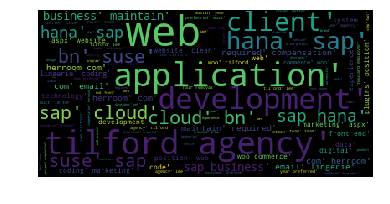

In [41]:
% matplotlib inline
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(keys))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

#Concluding remarks
Ideally for the IDF calculation to be effective, it should be based on a large corpora and a good representative of the text for which the keywords need to be extracted. In our example, if we use the full article text instead of the abstracts, the IDF extraction would be much more effective. However, considering the size of the dataset, I have limited the corpora to just the abstracts for the purpose of demonstration.
This is a fairly simple approach to understand fundamental concepts of NLP and to provide a good hands-on practice with some python codes on a real-life use case. The same approach can be used to extract keywords from news feeds & social media feeds.

SOURCE : https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
